# timeseries_fastai
>This repository aims to implement TimeSeries classification/regression algorithms. It makes extensive use of fastai training methods.

## Installation

In short, if you have anaconda, execute:

`$ pip install fastai_timeseries`

## Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline
The original paper repo is [here](https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline) is implemented in Keras/Tf.

- Notebook 01: This is a basic notebook that implements the Deep Learning models proposed in [Time Series Classification from Scratch with Deep Neural Networks: A Strong Baseline](https://arxiv.org/abs/1611.06455). 

## InceptionTime: Finding AlexNet for Time SeriesClassification
The original paper repo is [here](https://github.com/hfawaz/InceptionTime)

- Notebook 02: Added InceptionTime architecture from [InceptionTime: Finding AlexNet for Time SeriesClassification](https://arxiv.org/pdf/1909.04939.pdf). Need to check if the implementation is identical to paper, please comment.

## Getting Started

In [ ]:
from timeseries_fastai.core import *
from timeseries_fastai.data import *
from timeseries_fastai.models import *

In [ ]:
ucr_path = untar_data(URLs.UCR)

In [ ]:
ucr_path/'St'

Path('/home/tc256760/.fastai/data/Univariate2018_arff/St')

In [ ]:
df_train, df_test = load_df_ucr(ucr_path, 'StarLightCurves')

Loading files from: /home/tc256760/.fastai/data/Univariate2018_arff/StarLightCurves


In [ ]:
df = stack_train_valid(df_train, df_test)

In [ ]:
x_cols = df.columns[0:-2].to_list()

In [ ]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1017,att1018,att1019,att1020,att1021,att1022,att1023,att1024,target,valid_col
0,0.537303,0.531103,0.528503,0.529403,0.533603,0.540903,0.551103,0.564003,0.579603,0.597603,...,0.545903,0.543903,0.541003,0.537203,0.532303,0.526403,0.519503,0.511403,b'3',False
1,0.588398,0.593898,0.599098,0.604098,0.608798,0.613397,0.617797,0.622097,0.626097,0.630097,...,0.246499,0.256199,0.266499,0.277399,0.288799,0.300899,0.313599,0.326899,b'3',False
2,-0.049900,-0.041500,-0.033400,-0.025600,-0.018100,-0.010800,-0.003800,0.003000,0.009600,0.015900,...,-0.161601,-0.149201,-0.136401,-0.123201,-0.109701,-0.095901,-0.081701,-0.067100,b'1',False
3,1.337005,1.319805,1.302905,1.286305,1.270005,1.254005,1.238304,1.223005,1.208104,1.193504,...,1.298505,1.307705,1.316505,1.324905,1.332805,1.340205,1.347005,1.353205,b'3',False
4,0.769801,0.775301,0.780401,0.785101,0.789401,0.793301,0.796801,0.799901,0.802601,0.805101,...,0.744501,0.747301,0.750701,0.754801,0.759501,0.765001,0.771301,0.778401,b'3',False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9231,0.723503,0.722803,0.722803,0.723603,0.725203,0.727403,0.730303,0.733903,0.738003,0.742803,...,0.671702,0.675702,0.680402,0.686102,0.692602,0.700002,0.708403,0.717803,b'3',True
9232,0.629604,0.636304,0.643404,0.650704,0.658304,0.666204,0.674304,0.682504,0.691004,0.699604,...,0.603804,0.603204,0.602104,0.600404,0.598204,0.595404,0.592004,0.588104,b'3',True
9233,0.602902,0.604202,0.605802,0.607502,0.609402,0.611402,0.613502,0.615902,0.618302,0.620902,...,0.544002,0.549502,0.555002,0.560502,0.566002,0.571402,0.576802,0.582202,b'1',True
9234,-0.525899,-0.532599,-0.538699,-0.544299,-0.549399,-0.553999,-0.558199,-0.561899,-0.565199,-0.568099,...,-0.339999,-0.364799,-0.391999,-0.421799,-0.454199,-0.489399,-0.527399,-0.568299,b'2',True


In [ ]:
df.target.unique()

array([b'3', b'1', b'2'], dtype=object)

In [ ]:
dls = TSDataLoaders.from_df(df, x_cols=x_cols, label_col='target', valid_col='valid_col', bs=16)

In [ ]:
inception = create_inception(1, len(dls.vocab))

In [ ]:
learn = Learner(dls, inception, metrics=[accuracy])

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.290253,0.220855,0.912579,00:16
1,0.220386,0.244730,0.916586,00:15
2,0.163574,0.119654,0.968310,00:15
3,0.121743,0.099851,0.971710,00:15
4,0.100662,0.113393,0.964667,00:15


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

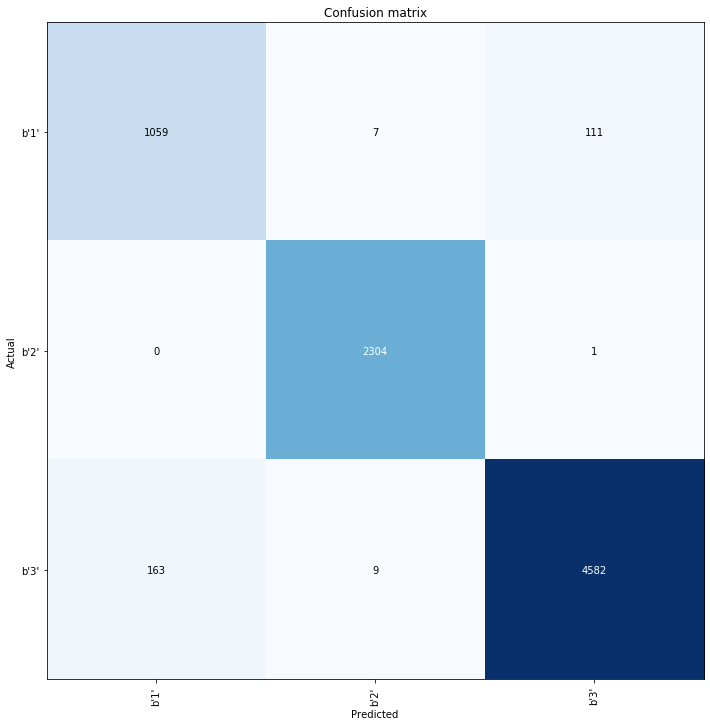

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

# Export -

In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_models.ipynb.
Converted 99_index.ipynb.
